In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #plotter
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler #pre-processer method

In [3]:
np.random.seed(30) # get random with seeded
samples = 1000 # dataset (n) samples

In [12]:
# normal distribution (guass) with random seed 30
income = np.random.normal(150000, 50000, samples) # on means 150000, with std deviation 50000 [100000 - 200000]
age      = np.random.normal(30, 10, samples) #means 30, with stddev 10 [20 - 40]
# uniform distribution (equally possibilities)
score = np.random.uniform(1, 100, samples) # 100%
# virtual random (pseudorandom) int type
purchases = np.random.randint(1, 15, samples) # [1 - 15] with not dependency poss


In [13]:
# take on table (dataframe)
df = pd.DataFrame({'income': income, 'age': age, 'score': score, 'purchases': purchases})

In [14]:
# TESTING
df

,income,age,score,purchases
0,165292.407243,55.600756,86.594469,2
1,50854.605762,40.622712,65.851042,5
2,201109.529092,30.391489,83.550358,5
3,144030.546671,36.435516,89.212069,5
4,178668.805982,40.552443,37.648364,9
...,...,...,...,...
995,143059.531656,14.954142,10.957774,12
996,186872.798535,36.513603,50.616669,8
997,149538.058421,14.021756,70.189281,6
998,189080.075681,41.388172,60.120922,5


In [15]:
# EDA (hyperparam) pre-processing
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df) ##### IMPORTANT

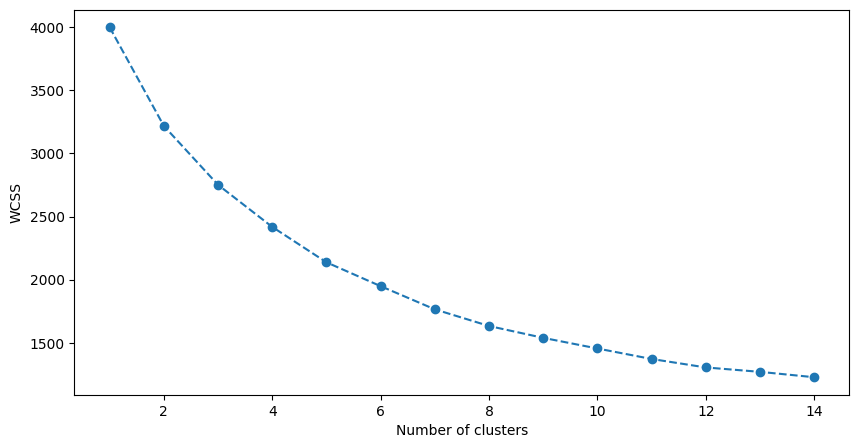

In [16]:
# Find clusters by WCSS < Within cluster sum square >
# Using Elbow method = for finding best spot on classification
wcss = []

# Base on purchases times (15 times make best Kmeans)
for i in range (1, 15) :
  kmeans = KMeans(n_clusters = i, random_state = 30, n_init = "auto")
  kmeans.fit(df_scaled)
  wcss.append(kmeans.inertia_) # set of distances weight by samples

# Plotting
plt.figure(figsize = (10, 5))
plt.plot(range(1, 15), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# elbows cmpr to purchases from DF "

*-- purchase = 3 is best spot is a start point to slowing down --*

In [17]:
# Applying K-Means
kmeans = KMeans(n_clusters = 3, random_state = 30, n_init = "auto")
df['KMeans_Cluster'] = kmeans.fit_predict(df_scaled)
kmeans.fit(df_scaled)

KMeans(n_clusters=3, random_state=30)

In [18]:
# Applying DBSCAN
# dbscan = DBSCAN(eps = 0.5, min_samples = 4) # init_guess  #param eps = epsilon, min_samples = samples in radius(eps)
dbscan = DBSCAN(eps = 0.566, min_samples = 10)
df['DBSCAN_Cluster'] = dbscan.fit_predict(df_scaled)
dbscan.fit_predict(df_scaled)

array([-1, -1, -1,  2, -1, -1, -1, -1, -1, -1, -1, -1,  1,  6, -1, -1, -1,
        2, -1, -1, -1, -1,  2, -1, -1, -1,  3, -1, -1,  1,  0,  1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1,  4, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  6,
       -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1,  4, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  2, -1,
       -1, -1, -1,  2, -1

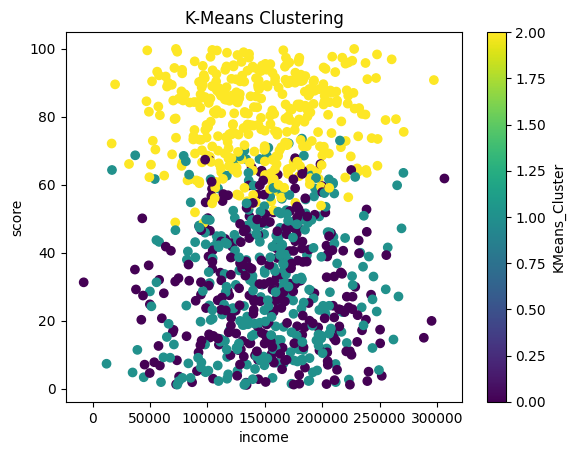

In [19]:
# Vusualize K-Means
plt.scatter(df['income'], df['score'], c = df['KMeans_Cluster']) # best use on score visualization :)
plt.xlabel('income')
plt.ylabel('score')
plt.title('K-Means Clustering')
plt.colorbar(label = 'KMeans_Cluster')
plt.show()

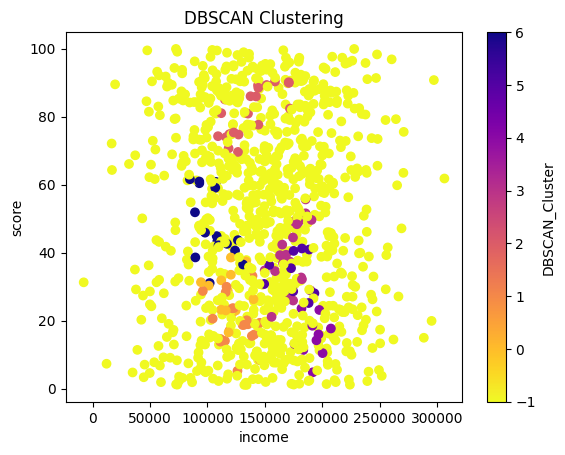

In [27]:
# Vusualize DBSCAN
plt.scatter(df['income'], df['score'], c = df['DBSCAN_Cluster'], cmap = 'plasma_r')
plt.xlabel('income')
plt.ylabel('score')
plt.title('DBSCAN Clustering')
plt.colorbar(label = 'DBSCAN_Cluster')
plt.show()

# **'-1' (Yellow) is NOISE**
Bad parameters take lots outlier

# **Conclusion**
KMeans Clustering
- Good at classification as group
- Easy to understanding & ease to use

DBSCAN
- Handle noise / outlier
- Good with not stable size

// -------------------------------------------------------------------------------------// <br>
from here **DBSCAN** its will be best. **BUT** needs optimal on difference size with "n-cluster"  required more parameters on densing.
 <br>
otherwise the **KMeans** is will be best model on the number of clusters is can be seek from **elbow method** its will be great on classification which don't care noise.<br>
// -------------------------------------------------------------------------------------//
